In [175]:
import numpy as np
import pandas as pd
import xlrd
import seaborn as sb
import matplotlib.pyplot as plt

%matplotlib inline

Y = 0
I = 1
C = 2
J = 3
E = 4
N = 5

In [176]:
def reading(files, prices):
    files[Y] = pd.read_excel('GDP_' + prices + '.xls')
    files[I] = pd.read_excel('Import_' + prices + '.xls')
    files[C] = pd.read_excel('Final_consumption_expenditure_' + prices + '.xls')
    files[J] = pd.read_excel('Gross_capital_formation_' + prices + '.xls')
    files[E] = pd.read_excel('Export_' + prices + '.xls')
    files[N] = pd.read_excel('Population.xls')
    return files

In [177]:
def number_to_column(number):
    if number == Y:
        return 'Y'
    elif number == I:
        return 'I'
    elif number == C:
        return 'C'
    elif number == J:
        return 'J'
    elif number == E:
        return 'E'
    elif number == N:
        return 'N'

In [178]:
def upgrade_data(files):
    
    k = 0
    answer = pd.DataFrame(columns = ['date'])
    while k < 6:
        index = pd.Index(files[k]['Country Name'])
        i = index.get_loc('India')
        df = files[k].iloc[[i]]
        df = df.drop(columns=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'])
        name = number_to_column(k)
        df = pd.DataFrame.transpose(df)
        df.columns = [name]
        df['date'] = df.index
        if k == 0:
            answer['date'] = df['date']
        answer = pd.merge(answer, df, how='outer', on='date')
        if k == N:
            answer[name] = answer[name].dropna() / 1000000
        else:
            answer[name] = answer[name].dropna() / 1000000000
        k += 1
    answer.head(n=5)
    dates = {}
    for i in range(1960, 1970):
        dates[i - 1960] = str(i)
    answer = answer.drop(index=dates)
    answer = answer.dropna()
    return answer

In [179]:
files_curr= {}
files_const = {}
files_curr = reading(files_curr, 'curr')
files_const = reading(files_const, 'const')


X_curr = upgrade_data(files_curr)
X_const = upgrade_data(files_const)
X_const.head(n=5)
    

,date,Y,I,C,J,E,N
10,1970,9993.870692,475.341105,7918.583292,1818.757653,446.426193,553.578513
11,1971,10158.063030,561.037898,8143.490750,1970.829958,451.122763,566.224812
12,1972,10101.858334,550.443182,8200.886448,1880.546359,488.285599,579.411513
13,1973,10434.767210,594.891997,8376.218144,2246.133776,512.521440,593.058926
14,1974,10558.454290,518.995165,8333.373058,2130.524286,554.547159,607.050255


## Task 1

,Y,I,C,J,E
date,,,,,
1970,0.046221,0.038114,0.051702,0.042867,0.039553
1971,0.048682,0.035671,0.054638,0.044770,0.040622
1972,0.053959,0.037137,0.059565,0.047403,0.045432
1973,0.063579,0.053262,0.069618,0.057052,0.055053
1974,0.074177,0.091866,0.084792,0.071697,0.068950


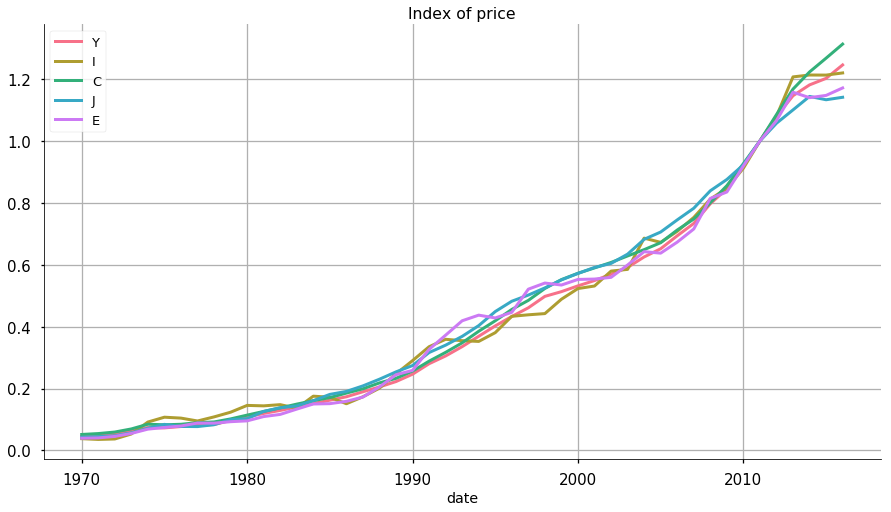

In [180]:
price_index = pd.DataFrame(columns = ['date', 'Y', 'I', 'C', 'J', 'E'])
price_index['date'] = X_curr['date']
i = 0
while i < 5:
    name = number_to_column(i)
    price_index[name] = X_curr[name] / X_const[name]
    i += 1
    
sb.set_context("talk", rc={"lines.linewidth": 3})
sb.set_palette("husl", 5)

price_index.index = price_index['date']
price_index = price_index.drop(columns=['date'])

fig = price_index.plot(figsize=(15, 8), title='Index of price', fontsize=15)

fig.grid()
sb.despine()
price_index.head(n=5)

## Task 2

,Y,I,C,J,E
date,,,,,
1970,0.834432,0.032728,0.739568,0.140838,0.031897
1971,0.873352,0.035344,0.785805,0.155828,0.032364
1972,0.940754,0.035280,0.843078,0.153852,0.038287
1973,1.118670,0.053427,0.983272,0.216079,0.047577
1974,1.290157,0.078540,1.163991,0.251631,0.062986


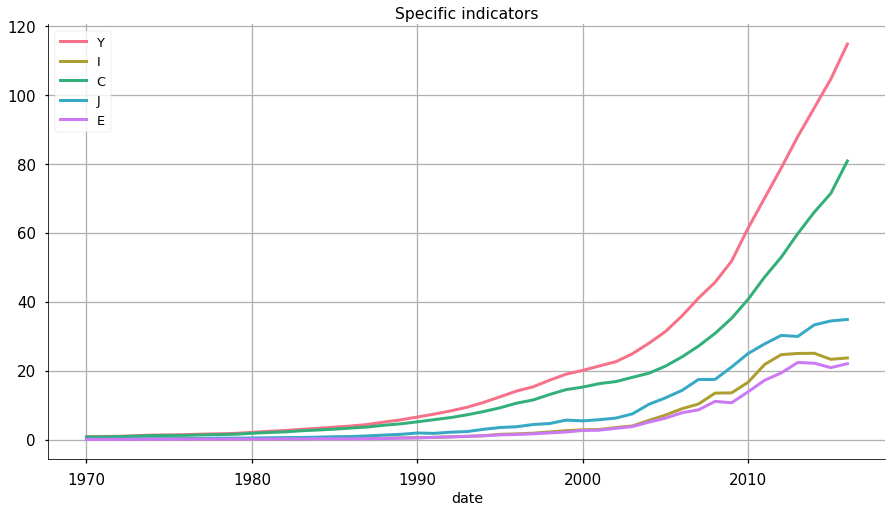

In [181]:
spec_ind = pd.DataFrame(columns = ['date', 'Y', 'I', 'C', 'J', 'E'])
spec_ind['date'] = X_curr['date']
i = 0
while i < 5:
    name = number_to_column(i)
    spec_ind[name] = X_curr[name] / X_curr['N']
    i += 1
    
sb.set_context("talk", rc={"lines.linewidth": 3})
sb.set_palette("husl", 5)

spec_ind.index = spec_ind['date']
spec_ind = spec_ind.drop(columns=['date'])

figure = spec_ind.plot(figsize=(15, 8), title='Specific indicators', fontsize=15)
figure.grid()
sb.despine()

spec_ind.head(n=5)

## Task 3

Mean =  -3.21614773212


,value
date,
1970,-5.205853
1971,-7.186210
1972,-6.063522
1973,-6.384348
1974,-8.030343


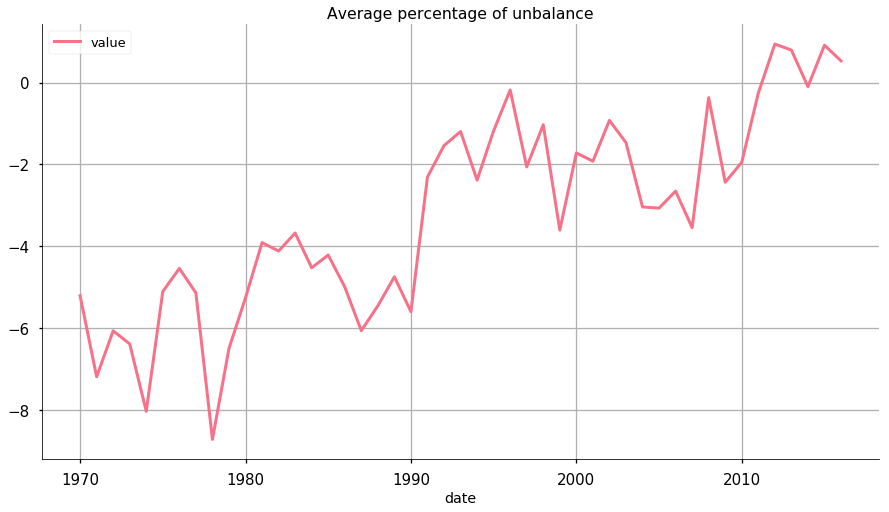

In [182]:
bal_per_curr = pd.DataFrame(columns = ['date', 'value'])
bal_per_curr['date'] = X_curr['date']
bal_per_curr['value'] = ((X_curr['Y'] + X_curr['I']) - (X_curr['C'] + X_curr['J'] + X_curr['E'])) / (X_curr['Y'] + X_curr['I']) * 100

sb.set_context("talk", rc={"lines.linewidth": 3})
sb.set_palette("husl", 5)

bal_per_curr.index = bal_per_curr['date']
bal_per_curr = bal_per_curr.drop(columns=['date'])

figure = bal_per_curr.plot(figsize=(15, 8), title='Average percentage of unbalance', fontsize=15)
figure.grid()
sb.despine()

print('Mean = ', bal_per_curr['value'].mean() )
bal_per_curr.head(n=5)